# Classification Module
## Corey Solitaire
### 9.24.2020

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Import Data
from acquire import get_telco_data
# Transform Data
from wrangle import wrangle_telco
# Split Data
from split_scale import train_valid_test
# Scale Data
from split_scale import standard_scaler, uniform_scaler, gaussian_scaler, min_max_scaler, iqr_robust_scaler 
# Inverse Scale
from split_scale import scale_inverse

# Acquisition and Prep (testing my acquire file)

In [2]:
df = get_telco_data(cached = True)
df

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.4
1691,9972-EWRJS,19.25,67,1372.9
1692,9975-GPKZU,19.75,46,856.5
1693,9993-LHIEB,67.85,67,4627.65


In [3]:
df.shape

(1695, 4)

In [4]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [5]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [7]:
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

### Takeaway:
1. Change total_charges to float, and replace NaN values with 0

In [8]:
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')
df["total_charges"].fillna(0, inplace = True) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


### Added changes to warangle file, time to test if they work (Testing my wrangle File)

In [10]:
df = wrangle_telco(get_telco_data(cached = True))

In [11]:
df.shape

(1695, 4)

In [12]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [13]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [15]:
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

### Data Visualization

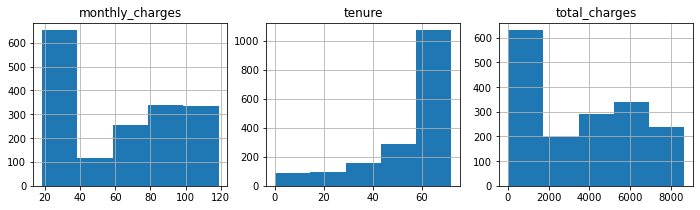

In [16]:
# Histograms

# Visualize the distribution for continuous variables

plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

### Takaway:
1. For customers with two year contracts: Total charges is skewed to the left, with the majority of the charges between 20 - 40 dollars
2. For customers with two year contracts: Tenure is skewed to the right, with the majority of customers > 60 months
3. For customers with two year contracts: Total charges is skewed to the left, with the majority of the charges between 0 and 2000 dollars

**When it is time to split data we will need to stratify on total_charges because the distrubution of charges are NOT balanced**

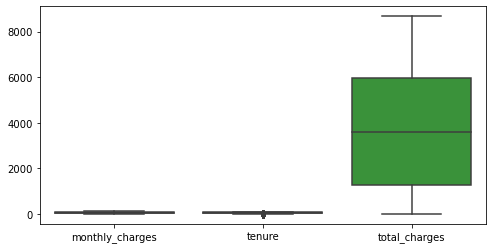

In [17]:
# Boxplots

# We don't want to plot the `customer_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id']))

### Takaway:
1. The variation in price (0 - 8,600 dollars) is too high to make a boxplot useful

## Cutting/Binning

Lets us turn a continous variable into a categorical one by putting the numerical features in to bins
- bins =   (defines bin)
- **pd.cut** creates bins of equal width
- **pd.qcut** creates bins with same number of observations in each

In both cases the range of teh bins is derermined from teh data(but we can also specifiy it ourselves)

**This can be helpfull for initial exploration, interpretation, and visualization.**

In [18]:
# right side of the bin is inclusive
# bins of equal width

pd.cut(df.tenure, bins = 10).value_counts()

(64.8, 72.0]     840
(57.6, 64.8]     229
(50.4, 57.6]     161
(43.2, 50.4]     128
(36.0, 43.2]      83
(28.8, 36.0]      71
(21.6, 28.8]      57
(7.2, 14.4]       53
(14.4, 21.6]      40
(-0.072, 7.2]     33
Name: tenure, dtype: int64

In [19]:
# right side of the bin is inclusive
# bins of equal size, different width

pd.qcut(df.tenure, 4).value_counts().sort_index()

(-0.001, 48.0]    432
(48.0, 64.0]      423
(64.0, 71.0]      497
(71.0, 72.0]      343
Name: tenure, dtype: int64

# Splitting and Scaling Numeric Data

In [20]:
# Read in my dataframe that has been split
train, validate, test = train_valid_test(df)
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

train (949, 4)
validate (407, 4)
test (339, 4)


In [21]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61,4616.05
225,1303-SRDOK,69.05,55,3842.60
662,3967-VQOGC,24.90,67,1680.25
628,3777-XROBG,19.55,58,1079.65
824,5075-JSDKI,24.45,59,1493.10


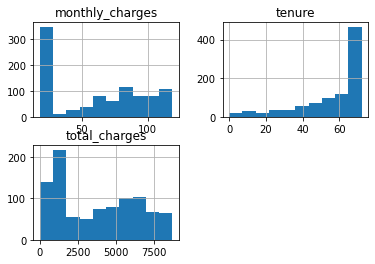

In [22]:
train.hist()
plt.show()

 ## Standard Scaler (Linear)

In [23]:
# Scale Data
train, validate, test = train_valid_test(df)
scaler1, train1, validate1, test1 = standard_scaler(train, validate, test)
print(scaler1)
print(train1.shape)
train1.head()

StandardScaler()
(949, 4)


,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,0.361757,0.245562,0.341114
225,1303-SRDOK,0.225110,-0.081509,0.043510
662,3967-VQOGC,-1.044987,0.572634,-0.788506
628,3777-XROBG,-1.198894,0.082026,-1.019602
824,5075-JSDKI,-1.057932,0.136538,-0.860517


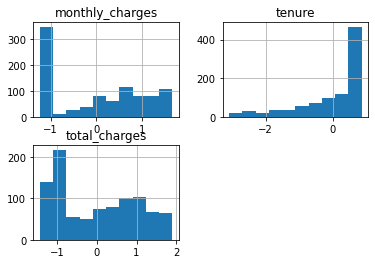

In [24]:
train1.hist()
plt.show()

In [25]:
# Inverse Scale

train = scale_inverse(scaler1, train1)
train

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61.0,4616.05
225,1303-SRDOK,69.05,55.0,3842.60
662,3967-VQOGC,24.90,67.0,1680.25
628,3777-XROBG,19.55,58.0,1079.65
824,5075-JSDKI,24.45,59.0,1493.10
...,...,...,...,...
441,2664-XJZNO,104.90,72.0,7559.55
98,0567-XRHCU,43.95,69.0,2960.10
886,5334-AFQJB,25.10,72.0,1789.90
322,2001-MCUUW,108.65,46.0,4903.20


## Uniform Scaler (Non Linear)

In [26]:
# Scale Data
train, validate, test = train_valid_test(df)
scaler2, train2, validate2, test2 = uniform_scaler(train, validate, test)
print(scaler2)
print(train2.shape)
train2.head()

QuantileTransformer(n_quantiles=100, random_state=123)
(949, 4)


,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,0.565550,0.439394,0.584729
225,1303-SRDOK,0.533680,0.338384,0.517998
662,3967-VQOGC,0.299435,0.570707,0.359850
628,3777-XROBG,0.050505,0.388889,0.202116
824,5075-JSDKI,0.278788,0.404040,0.327502


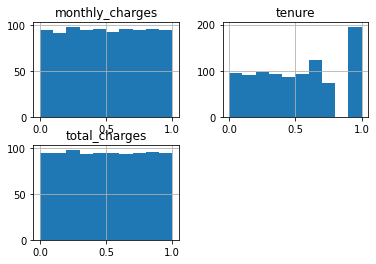

In [27]:
train2.hist()
plt.show()

In [28]:
# Inverse Scale
train, validate, test = train_valid_test(df)
train = scale_inverse(scaler2, train2)
train

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61.0,4616.05
225,1303-SRDOK,69.05,55.0,3842.60
662,3967-VQOGC,24.90,67.0,1680.25
628,3777-XROBG,19.55,58.0,1079.65
824,5075-JSDKI,24.45,59.0,1493.10
...,...,...,...,...
441,2664-XJZNO,104.90,72.0,7559.55
98,0567-XRHCU,43.95,69.0,2960.10
886,5334-AFQJB,25.10,72.0,1789.90
322,2001-MCUUW,108.65,46.0,4903.20


## Gaussian Scaler (Non Linear)

In [29]:
# Scale Data
train, validate, test = train_valid_test(df)
scaler3, train3, validate3, test3 = gaussian_scaler(train, validate, test)
print(scaler3)
print(train3.shape)
train3.head()

PowerTransformer(standardize=False)
(949, 4)


,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,11.950779,2986.746505,112.458429
225,1303-SRDOK,11.566921,2406.699374,102.936245
662,3967-VQOGC,6.856715,3633.313322,68.917544
628,3777-XROBG,6.011785,2688.457268,55.511292
824,5075-JSDKI,6.789850,2786.045189,65.059220


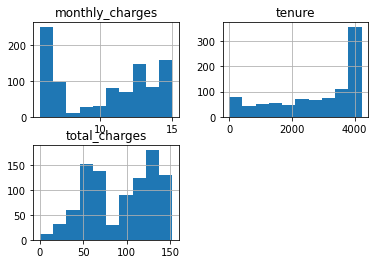

In [30]:
train3.hist()
plt.show()

In [31]:
# Inverse Scale

train = scale_inverse(scaler3, train3)
train

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61.0,4616.05
225,1303-SRDOK,69.05,55.0,3842.60
662,3967-VQOGC,24.90,67.0,1680.25
628,3777-XROBG,19.55,58.0,1079.65
824,5075-JSDKI,24.45,59.0,1493.10
...,...,...,...,...
441,2664-XJZNO,104.90,72.0,7559.55
98,0567-XRHCU,43.95,69.0,2960.10
886,5334-AFQJB,25.10,72.0,1789.90
322,2001-MCUUW,108.65,46.0,4903.20


## Min_Max Scaler (Linear)
**Should be used as default to mimmic range of boolean values (0-1)**

In [32]:
# Scale Data
train, validate, test = train_valid_test(df)
scaler4, train4, validate4, test4 = min_max_scaler(train, validate, test)
print(scaler4)
print(train4.shape)
train4.head()

MinMaxScaler()
(949, 4)


,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,0.552618,0.847222,0.532410
225,1303-SRDOK,0.505237,0.763889,0.443201
662,3967-VQOGC,0.064838,0.930556,0.193798
628,3777-XROBG,0.011471,0.805556,0.124526
824,5075-JSDKI,0.060349,0.819444,0.172213


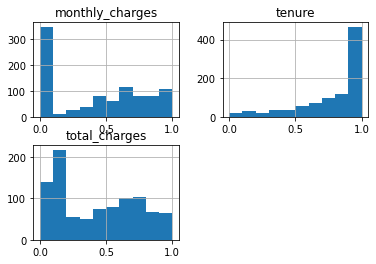

In [33]:
train4.hist()
plt.show()

In [34]:
# Inverse Scale

train = scale_inverse(scaler4, train4)
train

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61.0,4616.05
225,1303-SRDOK,69.05,55.0,3842.60
662,3967-VQOGC,24.90,67.0,1680.25
628,3777-XROBG,19.55,58.0,1079.65
824,5075-JSDKI,24.45,59.0,1493.10
...,...,...,...,...
441,2664-XJZNO,104.90,72.0,7559.55
98,0567-XRHCU,43.95,69.0,2960.10
886,5334-AFQJB,25.10,72.0,1789.90
322,2001-MCUUW,108.65,46.0,4903.20


## Robust Scaler (Linear)

In [35]:
# Scale Data
train, validate, test = train_valid_test(df)
scaler5, train5, validate5, test5 = iqr_robust_scaler(train, validate, test)
print(scaler5)
print(train5.shape)
train5.head()

RobustScaler()
(949, 4)


,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,0.134915,-0.125000,0.210319
225,1303-SRDOK,0.064492,-0.375000,0.049672
662,3967-VQOGC,-0.590067,0.125000,-0.399452
628,3777-XROBG,-0.669385,-0.250000,-0.524197
824,5075-JSDKI,-0.596738,-0.208333,-0.438323


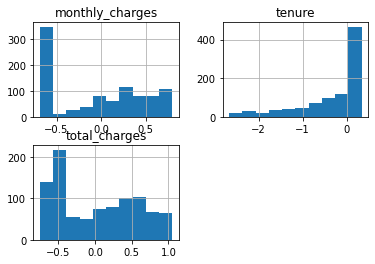

In [36]:
train5.hist()
plt.show()

In [37]:
# Inverse Scale

train = scale_inverse(scaler5, train5)
train

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.80,61.0,4616.05
225,1303-SRDOK,69.05,55.0,3842.60
662,3967-VQOGC,24.90,67.0,1680.25
628,3777-XROBG,19.55,58.0,1079.65
824,5075-JSDKI,24.45,59.0,1493.10
...,...,...,...,...
441,2664-XJZNO,104.90,72.0,7559.55
98,0567-XRHCU,43.95,69.0,2960.10
886,5334-AFQJB,25.10,72.0,1789.90
322,2001-MCUUW,108.65,46.0,4903.20


## Takeaway:
**For this dataset, the uniform scaler provides the best output distribution**